<a href="https://colab.research.google.com/github/varraj/Multiple-LR-titanic/blob/main/DS_C23_Advanced_Session___The_Mathematics_behind_Logistic_Regression_Slot_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ds-c23-advanced-session-the-mathematics-behind-logistic-regression-slot-1')
jovian.set_colab_id('1xRxl7dC_CzKp6zLFCN2ZKGHw57I7L1eT')

     |████████████████████████████████| 71kB 3.2MB/s 


# Logistic Regression on titanic dataset:

__The goal is to predict the number of passengers travelling in RMS Titanic using Logistic Regression.__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/titanic.csv")

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].mode()

0    S
dtype: object

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
# Embarked

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['Age'].median()

28.0

In [ ]:
# Age and Fare

df['Age'] = df['Age'].fillna(df['Age'].median())
# df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# Cabin

df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# FamilySize

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
# Sex

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df['GenderClass'] = df.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,S,6,female
464,465,0,3,"Maisner, Mr. Simon",male,28.0,0,0,A/S 2816,8.0500,S,1,male
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,S,4,female
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,S,1,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,female


In [ ]:
df['GenderClass'].value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  GenderClass  891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
df = pd.get_dummies(df, columns=['GenderClass', 'Embarked'], drop_first=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,1,0,1


In [ ]:
df.drop(['Name','Ticket','Sex','SibSp','Parch'], axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


In [ ]:
df.shape

(891, 10)

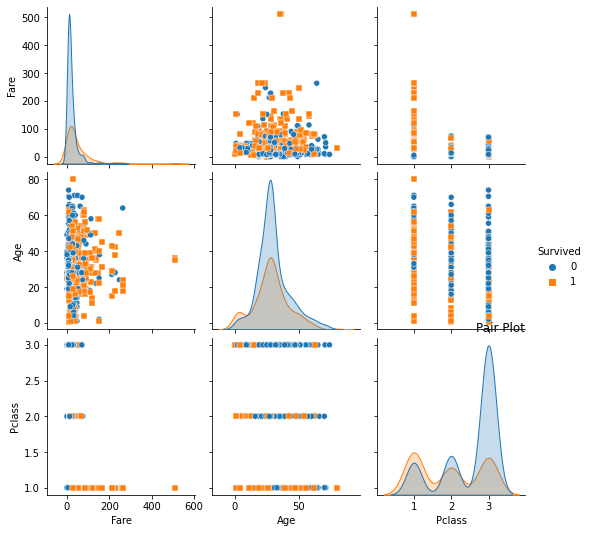

In [ ]:
sns.pairplot(df[['Fare','Age','Pclass','Survived']], vars=['Fare','Age','Pclass'], hue='Survived', markers=['o','s'])
plt.title("Pair Plot",loc='right');

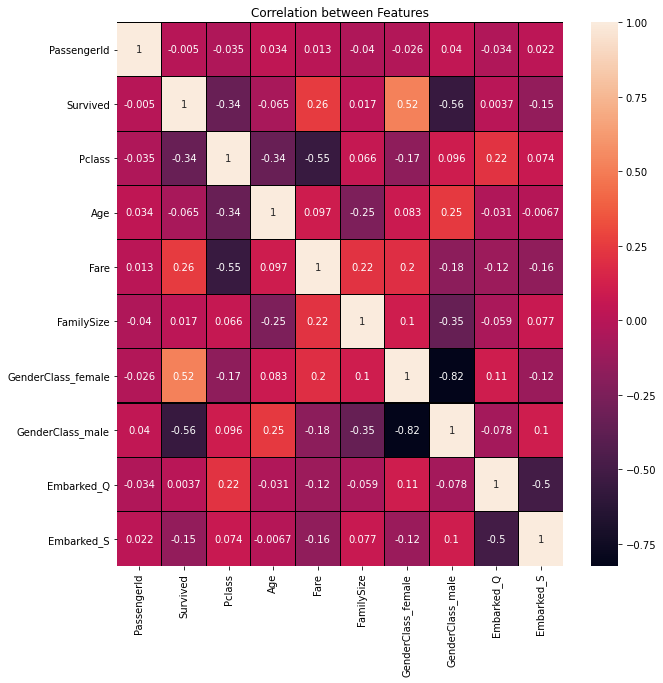

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.1,annot=True,linecolor='black');
plt.title("Correlation between Features");

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


In [ ]:
X = df.loc[:,df.columns!='Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [ ]:
y = df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(712, 9)

In [ ]:
X_test.shape

(179, 9)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = lr.predict(X_train)

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
accuracy_score(y_train,y_pred_train)

0.8160112359550562

In [ ]:
accuracy_score(y_test,y_pred_test)

0.8044692737430168

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       106
           1       0.84      0.64      0.73        73

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[97,  9],
       [26, 47]])

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

,0,1
0,97,9
1,26,47


In [ ]:
cm.index = ['Actual Died', 'Actual Survived']
cm.columns = ['Predicted Died', 'Predicted Survived']

In [ ]:
cm

,Predicted Died,Predicted Survived
Actual Died,97,9
Actual Survived,26,47


In [ ]:
lr.predict(X_test) 

# Prob >= 0.5 -> Survived
# Prob <  0.5 -> Died

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [ ]:
X_test.shape

(179, 9)

In [ ]:
lr.predict_proba(X_test) 

# Prob >= 0.5 -> Survived
# Prob <  0.5 -> Died

array([[0.03334738, 0.96665262],
       [0.94219302, 0.05780698],
       [0.11943954, 0.88056046],
       [0.26891925, 0.73108075],
       [0.3122382 , 0.6877618 ],
       [0.9218865 , 0.0781135 ],
       [0.9084154 , 0.0915846 ],
       [0.06104356, 0.93895644],
       [0.71483598, 0.28516402],
       [0.38367565, 0.61632435],
       [0.91614548, 0.08385452],
       [0.31640175, 0.68359825],
       [0.70345875, 0.29654125],
       [0.86103253, 0.13896747],
       [0.31114117, 0.68885883],
       [0.60549072, 0.39450928],
       [0.71312643, 0.28687357],
       [0.93414553, 0.06585447],
       [0.94700768, 0.05299232],
       [0.28981358, 0.71018642],
       [0.93830218, 0.06169782],
       [0.96220159, 0.03779841],
       [0.03177338, 0.96822662],
       [0.79096592, 0.20903408],
       [0.63159451, 0.36840549],
       [0.91596728, 0.08403272],
       [0.04701319, 0.95298681],
       [0.09130847, 0.90869153],
       [0.80520184, 0.19479816],
       [0.02113642, 0.97886358],
       [0.

In [ ]:
lr.predict_proba(X_test)[:,1]

# Prob >= 0.5 -> Survived
# Prob <  0.5 -> Died

array([0.96665262, 0.05780698, 0.88056046, 0.73108075, 0.6877618 ,
       0.0781135 , 0.0915846 , 0.93895644, 0.28516402, 0.61632435,
       0.08385452, 0.68359825, 0.29654125, 0.13896747, 0.68885883,
       0.39450928, 0.28687357, 0.06585447, 0.05299232, 0.71018642,
       0.06169782, 0.03779841, 0.96822662, 0.20903408, 0.36840549,
       0.08403272, 0.95298681, 0.90869153, 0.19479816, 0.97886358,
       0.80034633, 0.37659002, 0.39314083, 0.73032113, 0.05214852,
       0.18243513, 0.39049631, 0.05531197, 0.3217563 , 0.07955531,
       0.71130666, 0.56382823, 0.94962042, 0.34511502, 0.7187632 ,
       0.05936651, 0.13207845, 0.19615367, 0.7133748 , 0.23387904,
       0.13762978, 0.87484753, 0.16693664, 0.14954901, 0.05272902,
       0.65526776, 0.15549645, 0.36056354, 0.01084011, 0.74798754,
       0.17501301, 0.07580815, 0.1848085 , 0.3239204 , 0.39804981,
       0.57150699, 0.04392034, 0.0532209 , 0.43655438, 0.0960601 ,
       0.04717485, 0.26885235, 0.41798728, 0.07919937, 0.89082

In [ ]:
lr.predict_proba(X_test)[:,1] > 0.75

# Prob >= 0.75 -> Survived
# Prob <  0.5 -> Died

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,

In [ ]:
preds1 = np.where(lr.predict_proba(X_test)[:,1] > 0.75, 1, 0)

In [ ]:
preds1

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [ ]:
accuracy_score(y_test, preds1)

0.7430167597765364

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import  StandardScaler

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
clf = LogisticRegression(random_state=0, multi_class='ovr')

In [ ]:
model = clf.fit(X_std, y)

In [ ]:
new_observation = [ [0.5, 0.5, 0.5, 0.5] ]

In [ ]:
model.predict(new_observation)

array([2])

In [ ]:
model.predict_proba(new_observation)

array([[0.0387617 , 0.40669108, 0.55454723]])

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])